In [1]:
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
         'figure.figsize': (5, 3),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

def hoeffding_delta (n, epsilon):
    delta = 2 * math.exp(-2*n*(epsilon**2))
    return delta

def hoeffding_n(delta, epsilon):
    n = math.log(2/delta) / (2*epsilon**2)
    return n

def hoeffding_epsilon(n, delta):
    epsilon = math.sqrt( math.log(2/delta) / (2*n) )
    return epsilon


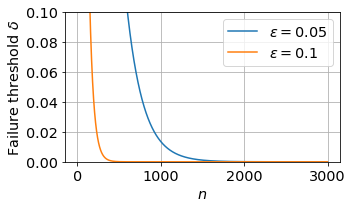

In [2]:
nvalues = np.arange (1, 3000, 1)

#PLOT LINE FOR EPSILON 0.05
delta = [ hoeffding_delta(n=nval, epsilon=0.05) for nval in nvalues ]
plt.plot (nvalues, delta, label='$\epsilon = 0.05$')

#PLOT LINE FOR EPSILON 0.1
delta = [ hoeffding_delta(n=nval, epsilon=0.10) for nval in nvalues ]
plt.plot (nvalues, delta, label='$\epsilon = 0.1$')

#NAME AXES
plt.xlabel ('$n$')
plt.ylabel ('Failure threshold $\delta$')

plt.ylim(0,0.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


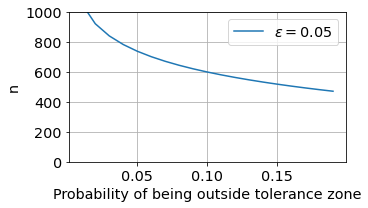

In [3]:
deltavalues = np.arange (0.01, .2, .01)

#PLOT LINE FOR EPSILON=0.05
n = [ hoeffding_n(delta=deltaval, epsilon=0.05) for deltaval in deltavalues ]
plt.plot (deltavalues, n, label='$\epsilon = 0.05$')

#NAME AXES
plt.xlabel ('Probability of being outside tolerance zone')
plt.ylabel ('n')

plt.ylim(0,1000)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

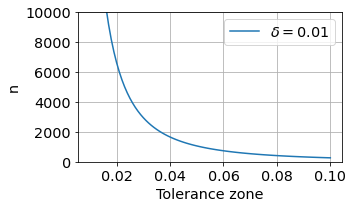

In [4]:
epsilonvalues = np.arange (0.01, .1, .001)

#PLOT LINE FOR DELTA = 0.01
n = [ hoeffding_n(delta=0.01, epsilon=epsilonval) for epsilonval in epsilonvalues ]
plt.plot (epsilonvalues, n, label='$\delta = 0.01$')

#NAME AXES
plt.xlabel ('Tolerance zone')
plt.ylabel ('n')

plt.ylim(0,10000)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

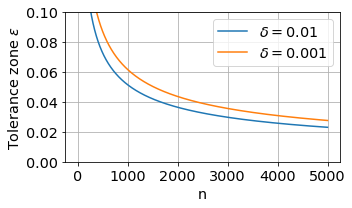

In [5]:
nvalues = np.arange (1, 5000, 1)

#PLOT LINE FOR DELTA = 0.01
epsilon = [ hoeffding_epsilon(n=nval, delta=0.01)  for nval in nvalues ]
plt.plot (nvalues, epsilon, label='$\delta = 0.01$')

#PLOT LINE FOR DELTA = 0.001
epsilon = [ hoeffding_epsilon(n=nval, delta=0.001) for nval in nvalues ]
plt.plot (nvalues, epsilon, label='$\delta = 0.001$')

#NAME AXES
plt.ylabel ('Tolerance zone $\epsilon$')
plt.xlabel ('n')

plt.ylim(0,0.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Finite function classes



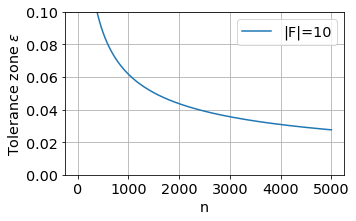

In [6]:
nvalues = np.arange (1, 5000, 1)

def hoeffding_epsilon_finite(n, delta, F):
    epsilon = math.sqrt( math.log((2*F)/delta) / (2*n) )
    return epsilon

#PLOT LINE FOR |F|=10
epsilon = [ hoeffding_epsilon_finite(n=nval, delta=0.01, F=10) for nval in nvalues ]
plt.plot (nvalues, epsilon, label='|F|=10')

#NAME AXES
plt.ylabel ('Tolerance zone $\epsilon$')
plt.xlabel ('n')

plt.ylim(0,0.1)
plt.legend()
plt.grid(True)
plt.show()

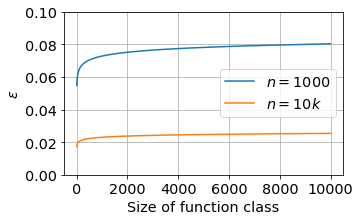

In [8]:
Fvalues = np.arange (10, 10000, 10)

#PLOT LINE FOR n=1000
epsilon = [ hoeffding_epsilon_finite(n=1000, delta=0.05, F=fval) for fval in Fvalues ]
plt.plot (Fvalues, epsilon, label='$n=1000$')

#PLOT LINE FOR n=10000
epsilon = [ hoeffding_epsilon_finite(n=10000, delta=0.05, F=fval) for fval in Fvalues ]
plt.plot (Fvalues, epsilon, label='$n=10k$')

#NAME AXES
plt.ylabel ('$\epsilon$')
plt.xlabel ('Size of function class')

plt.ylim(0,0.1)
plt.legend()
plt.grid(True)
plt.show()
